In [1]:
import copy
import re
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from collections import OrderedDict

In [2]:
#lines[:15]

In [3]:
data_path = '../data/ancient/'
# input_file = 'povest.txt'

In [4]:

# Vectorize the data.

lines = []

input_files= ['povest', 'kazanskay_istoriya', 'domostroi', 
              'gibel_tsarstv', 'hojdeniq_pozdnyakova', 'jitie_dionisia',
             'jitie_feodora', 'jitie_zosimi', 'ob_osade', 'povest_batoria', 'povest_pskov',
             'pateric', 'slovo_daniila', 'pouch_kirill', 'hojd_daniila', 'feodosia', 'iz_apostola',
             'chudesa', 'povest_o_varlaame', 'iz_sbornika_1076', 'jitie_moiseya', 'eloha',
             'jitie_avraamia', 'mongolo', 'batyem', 'galicko', 'pchela', 'mamaevo', 'jitie_sergia',
             'o_vzyatii_turkami', 'slovo_fomy', 'jitie_kirilla', 'smert_pafnutia']


#input_files= ['povest']

for input_file in input_files:
    with open(data_path+input_file+'.txt', 'r', encoding='utf-8') as f:
        lines += f.read().split('\n')



In [5]:
len(lines)

15472

In [6]:
# in ch: [' ', '"', '(', ')', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', 'a', 'e', 'h', 'y', 'κ', 'ο', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']


In [7]:
# out ch: ['\t', '\n', ' ', '"', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', '´', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'ѝ', 'ѣ']

In [8]:
['н',
 'ѣ',
 'o',
 '9',
 'т',
 'ю',
 'о',
 'ж',
 'ы',
 'ф',
 'г',
 'ѵ',
 'ъ',
 'ο',
 'e',
 '2',
 '7',
 '8',
 'с',
 'у',
 'л',
 'é',
 '{',
 '4',
 'ù',
 't',
 'е',
 'τ',
 'щ',
 '…',
 '6',
 'a',
 'х',
 'и',
 '3',
 'c',
 'й',
 '\t',
 'б',
 'к',
 'i',
 'ч',
 'β',
 'ш',
 '5',
 'ó',
 '1',
 '.',
 'в',
 'а',
 'п',
 'à',
 '0',
 'р',
 'д',
 'ѝ',
 "'",
 'і',
 'y',
 'м',
 'ц',
 'h',
 '\n',
 'з',
 'ь',
 'я',
 'ё',
 ' ',
 'κ',
 'ý',
 'э']

['н',
 'ѣ',
 'o',
 '9',
 'т',
 'ю',
 'о',
 'ж',
 'ы',
 'ф',
 'г',
 'ѵ',
 'ъ',
 'ο',
 'e',
 '2',
 '7',
 '8',
 'с',
 'у',
 'л',
 'é',
 '{',
 '4',
 'ù',
 't',
 'е',
 'τ',
 'щ',
 '…',
 '6',
 'a',
 'х',
 'и',
 '3',
 'c',
 'й',
 '\t',
 'б',
 'к',
 'i',
 'ч',
 'β',
 'ш',
 '5',
 'ó',
 '1',
 '.',
 'в',
 'а',
 'п',
 'à',
 '0',
 'р',
 'д',
 'ѝ',
 "'",
 'і',
 'y',
 'м',
 'ц',
 'h',
 '\n',
 'з',
 'ь',
 'я',
 'ё',
 ' ',
 'κ',
 'ý',
 'э']

In [9]:
def preproc(line):
    
    replace_dict = OrderedDict({
                                    '<...>': '',
                                    '«': '', '»': '',
                                    '...': '',
                                    '!.': '.',
                                    '!': '.',
                                    '?.': '.',
                                    '?': '.',     
                                    ';': ',', #!!!
    })
    
    for k in replace_dict.keys():
        line = line.replace(k, replace_dict[k])
        
    
    line = re.sub(r"\[\d+\]", "", line)
    line = re.sub(r"\(\d+\)", "", line)
    line = re.sub(r" \.", ".", line)

    replace_dict_2 = OrderedDict({
        '.,': '.',
        '—': '',
        '“': '',
        '”': '',
        '’': '',
        '˝': '',
        '"': '',
        '´': '',
        '(': '', ')': '',
        '<': '', '>': '',
        '-': '', 
        '„': '',
        '̀': '',
        '́': '',
        '*': '',
        '…': '',  
        "'": '',
        '{': '',
        '}': '',
                                
    })
    
    for k in replace_dict_2.keys():
        line = line.replace(k, replace_dict_2[k])
                
    line = re.sub(r'(\.)(\S)', r'\1	\2', line)
    line = re.sub(r'(\:)(\S)', r'\1	\2', line)
    
    line = line.replace(',', '') #!!
    #line = line.replace('.', '') #!!!
    line = line.replace(':', '')
    
    line = line.lower() #!!!
    
    return line

In [10]:
# Add splitting of original and  translation

In [12]:
max_num = 200000

new_lines = []

for i, line_orig in enumerate(lines[:max_num]):
    if line_orig in ["", ' ']:
        continue
    
    line = copy.copy(line_orig)
    line = preproc(line)
    
    #print([line], '\n')
    
    num_t = len(re.findall(r'\t', line))
    if num_t != 1:
        print('\n=== ',i,' === ')
        print([line_orig], '\n')
        print('line = ', [line], '\n')
        #raise Exception('\t number %s != 1'%num_t) #!!!!!!
        pass
    else: 
        line += '\n'
        new_lines += [line]

    



===  1173  === 
['О КАЗАНСКОМЪ ЦАРСТВѢ. ГЛАВА 1О КАЗАНСКОМ ЦАРСТВЕ. ГЛАВА 1'] 

line =  ['о казанскомъ царствѣ. глава 1о казанском царстве. глава 1'] 


===  1178  === 
['ГЛАВА 2ГЛАВА 2'] 

line =  ['глава 2глава 2'] 


===  1184  === 
['О ВЗЯТИИ ВЕЛИКАГО НОВА ГРАДА ОТ ВЕЛИКАГО КНЯЗЯ ИОАННА ВАСИЛЬЕВИЧА, И ПОХВАЛА ТОМУ ЖЕ ВЕЛИКОМУ КНЯЗЮ. ГЛАВА 3О ВЗЯТИИ ВЕЛИКИМ КНЯЗЕМ ИВАНОМ ВАСИЛЬЕВИЧЕМ ВЕЛИКОГО НОВГОРОДА И ПОХВАЛА ТОМУ ЖЕ ВЕЛИКОМУ КНЯЗЮ. ГЛАВА 3'] 

line =  ['о взятии великаго нова града от великаго князя иоанна васильевича и похвала тому же великому князю. глава 3о взятии великим князем иваном васильевичем великого новгорода и похвала тому же великому князю. глава 3'] 


===  1190  === 
['О ПОСЛѢХ, ОТ ЦАРЯ ПРИШЕДШИХЪ К ВЕЛИКОМУ КНЯЗЮ МОСКОВСКОМУ, И О ЯРОСТИ ЦАРЕВЕ НА НЕГО, И О ГРУБОСТИ ВЕЛИКАГО КНЯЗЯ НА ЦАРЯ. ГЛАВА 4О ПОСЛАХ, ПРИШЕДШИХ ОТ ЦАРЯ К ВЕЛИКОМУ КНЯЗЮ МОСКОВСКОМУ, И О ЯРОСТИ ЦАРЯ, И О ТОМ, КАК НАГРУБИЛ ЕМУ ВЕЛИКИЙ КНЯЗЬ. ГЛАВА 4'] 

line =  ['о послѣх от царя пришедшихъ к в


===  2459  === 
['От той же церькви близь на восточную страну, к горе Елѣоньстей,[124] стоятъ врата великие железные старого града Иерусалима затворена, не входитъ в них никто. В те врата въехал Господь нашь Исусъ Христосъ от Вифания[125] на жребцы и осли з горы Елеонъския. Дети еврѣйския резаху ветьвие от древесъ и постилаху по пути от техъ вратъ и до церкви, пояху пред нимъ: «Благословен грядый во имя Господнѣ, осанна в вышьних,[126] царь Иизраилевъ!». И приеха Господь нашь к той церькви на жребцы и осли. Пред тою церьковью лежитъ пред враты камень дикой широкъ, на четырѣ углы. И на тотъ камень возъѣха Господь нашь и позна камень Создателя своего, и ста камень под жребцомъ мякокъ, аки воскъ.[127] И вообразишася стопы жребцовы в тотъ камень до полуперста, знать и до сего дни. Ис тое же церкви Господь нашь Исусъ Христосъ изгна торжники,[128] продающе овца, и голуби, и птицы, и столы опроверьжѣ и пенязи розсыпа и рече имъ: «Не творите дому купленного, домъ молитве, домъ Отца моего». В 

['О ПРОХОРЕ ЧЕРНОРИЗЦИ, ИЖЕ МОЛИТВОЮ В БЫЛИА, ГЛАГОЛЕМѢЙ ЛОБЕДА, ТВОРЯШЕ ХЛѢБЫ И ВЪ ПОПЕЛУ СОЛЬ. СЛОВО 31О ПРОХОРЕ-ЧЕРНОРИЗЦЕ, КОТОРЫЙ ИЗ ТРАВЫ, НАЗЫВАЕМОЙ ЛЕБЕДА, МОЛИТВОЮ ДЕЛАЛ ХЛЕБЫ, А ИЗ ПЕПЛА СОЛЬ. СЛОВО 31'] 

line =  ['о прохоре черноризци иже молитвою в былиа глаголемѣй лобеда творяше хлѣбы и въ попелу соль. слово 31о прохоречерноризце который из травы называемой лебеда молитвою делал хлебы а из пепла соль. слово 31'] 


===  4446  === 
['О ПРЕПОДОБНЕМЪ МАРЦѢ ПЕЧЕРНИЦѢ, ЕГОЖЕ ПОВЕЛѢНИА МЕРТВИИ ПОСЛУШАХУ. СЛОВО 32О ПРЕПОДОБНОМ МАРКЕ ПЕЩЕРНИКЕ, ПОВЕЛЕНИЙ КОТОРОГО МЕРТВЫЕ СЛУШАЛИСЬ. СЛОВО 32'] 

line =  ['о преподобнемъ марцѣ печерницѣ егоже повелѣниа мертвии послушаху. слово 32о преподобном марке пещернике повелений которого мертвые слушались. слово 32'] 


===  4500  === 
['О СВЯТЫХЪ ПРЕПОДОБНЫХ ОТЦЕХЪ ФЕОДОРЕ И ВАСИЛИИ. СЛОВО 33О СВЯТЫХ ПРЕПОДОБНЫХ ОТЦАХ ФЕОДОРЕ И ВАСИЛИИ. СЛОВО 33'] 

line =  ['о святыхъ преподобных отцехъ феодоре и василии. слово 33о святых преподобных отцах 

line =  ['господине мой. то не море топить корабли но вѣтри'] 


===  5184  === 
['Не огнь творить ражежение желѣзу, но надымание мѣшное;'] 

line =  ['не огнь творить ражежение желѣзу но надымание мѣшное'] 


===  5185  === 
['Такоже и князь не самъ впадаеть въ вещь, но думци вводять.'] 

line =  ['такоже и князь не самъ впадаеть въ вещь но думци вводять.'] 


===  5186  === 
['3 добрымъ бо думцею думая, князь высока стола добудеть,'] 

line =  ['3 добрымъ бо думцею думая князь высока стола добудеть'] 


===  5188  === 
['Не огонь раскаляет железо, а нагнетающие воздух мехи;'] 

line =  ['не огонь раскаляет железо а нагнетающие воздух мехи'] 


===  5189  === 
['Так же и князь не сам впадает в грех, а советники вводят.'] 

line =  ['так же и князь не сам впадает в грех а советники вводят.'] 


===  5190  === 
['С мудрым советником совещаясь, князь высокий престол займет,'] 

line =  ['с мудрым советником совещаясь князь высокий престол займет'] 


===  5191  === 
['А с плохим советник

line =  ['24. сущее24. сущее иак. 2 67'] 


===  6936  === 
['25. Сущее25. Сущее <Иак, 2, 8—9>'] 

line =  ['25. сущее25. сущее иак 2 89'] 


===  6939  === 
['26. Сущее26. Сущее <Иак. 2, 10>'] 

line =  ['26. сущее26. сущее иак. 2 10'] 


===  6942  === 
['27. Сущее27. Сущее <Иак. 2, 11>'] 

line =  ['27. сущее27. сущее иак. 2 11'] 


===  6945  === 
['28. Сущее28. Сущее <Иак, 2, 12>'] 

line =  ['28. сущее28. сущее иак 2 12'] 


===  6948  === 
['29. Сущее29. Сущее <Иак. 2, 13>'] 

line =  ['29. сущее29. сущее иак. 2 13'] 


===  6951  === 
['30. Сущее30. Сущее <Иак. 2, 13>'] 

line =  ['30. сущее30. сущее иак. 2 13'] 


===  6954  === 
['Яко не от вѣры токмо, нъ от дѣлъ, и не от единоя неправедно, нъ от обою купно оправдается человѣкъО том, что ке только верою, но и делами, и не только одним неправедно, но и тем и другим вместе оправдывается человек'] 

line =  ['яко не от вѣры токмо нъ от дѣлъ и не от единоя неправедно нъ от обою купно оправдается человѣкъо том что ке только верою 

===  12644  === 
['О СЛАВѣО СЛАВЕ'] 

line =  ['о славѣо славе'] 


===  12656  === 
['О МНОГОМОЛВЛЕНИИО БОЛТЛИВОСТИ'] 

line =  ['о многомолвлениио болтливости'] 


===  12668  === 
['О СМИРЕНИИО СМИРЕНИИ'] 

line =  ['о смирениио смирении'] 


===  12674  === 
['О ВРАЧѣХЪО ВРАЧАХ'] 

line =  ['о врачѣхъо врачах'] 


===  12680  === 
['О ПАМЯТИО ПАМЯТИ'] 

line =  ['о памятио памяти'] 


===  12686  === 
['О ЗАВИСТИО ЗАВИСТИ'] 

line =  ['о завистио зависти'] 


===  12704  === 
['О ВОЛЬНѣМ И НЕВОЛЬНѣМО СВОБОДНОМ И НЕСВОБОДНОМ'] 

line =  ['о вольнѣм и невольнѣмо свободном и несвободном'] 


===  12710  === 
['О РАЗУМѣ И О СОБѣО САМОПОЗНАНИИ'] 

line =  ['о разумѣ и о собѣо самопознании'] 


===  12722  === 
['О ЗАКОНѣО ЗАКОНЕ'] 

line =  ['о законѣо законе'] 


===  12731  === 
['О БЕЗУМЬИО НЕДОСТАТКЕ УМА'] 

line =  ['о безумьио недостатке ума'] 


===  12740  === 
['О БЛУЖЕНИИО ЗАБЛУЖДЕНИИ'] 

line =  ['о блужениио заблуждении'] 


===  12746  === 
['3инонъ. Сь пряся с раздавающимъ

In [13]:
len(new_lines)

5666

In [184]:
# out_file = 'povest_processed.txt'

# with open(data_path+out_file, 'w', encoding='utf-8') as f:
#     f.writelines(new_lines)
    

In [162]:
# import re
# line = re.sub(r"</?\[\d+>", "", line)
# Edit: Here's a commented version explaining how it works:

# line = re.sub(r"""
#   (?x) # Use free-spacing mode.
#   <    # Match a literal '<'
#   /?   # Optionally match a '/'
#   \[   # Match a literal '['
#   \d+  # Match one or more digits
#   >    # Match a literal '>'
#   """, "", line)

In [14]:
print(line)

егда же погребохом старца тогда нѣции приидоша от града повѣдающе намъ яко вес град подвижеся не точью игумени и сьвященници и мниси но и содержащии того града намѣстници и прочий общий народъ уже путь начинають шесьтвовати аще не быша предварили прежеречении скорошественици бывъшии в монастыри повѣдающе им яко всуе трудитеся желаемаго не получите понеже аще и мы уранихом ничтоже возмогохомъ видѣти от надѣемых труд наших без успѣха они же сия слышавше велику тщету себѣ вмѣниша быти окающеся сами и глаголюще яко недостойни быхом такова раба божиа поне одру прикоснутися мнози же от велможь скоро въ монасьтырь приидоша аще и не видѣшя преподобнаго поне со многою любовию гробу его поклонишася такожде и общий народ весь день от града приходяще покланяхуся гробу преподобнаго	когда уже погребли мы старца тогда некоторые жители пришли из города поведав нам что весь город поднялся не только игумены и священники и монахи но и правящие городом наместники и все остальные горожане направились в пут

In [62]:
# line = 'В лѣто 6370. И изгнаша варягы за море, и не даша имъ дани, и почаша сами в собѣ володѣти. И не бѣ в нихъ правды, и въста родъ на род, и быша усобицѣ в них, и воевати сами на ся почаша. И ркоша: «Поищемъ сами в собѣ князя, иже бы володѣлъ нами и рядилъ по ряду, по праву.» Идоша за море к варягом, к руси. Сице бо звахуть ты варягы русь, яко се друзии зовутся свее, друзии же урмани, аньгляне, инѣи и готе, тако и си.[58] Ркоша руси чюдь, словенѣ, кривичи и вся: «Земля наша велика и обилна, а наряда въ ней нѣтъ. Да поидете княжить и володѣть нами». И изъбрашася трие брата с роды своими, и пояша по собѣ всю русь, и придоша къ словѣномъ пѣрвѣе. И срубиша город Ладогу. И сѣде старѣйший в Ладозѣ Рюрикъ, а другий, Синеусъ на Бѣлѣ озерѣ, а третѣй Труворъ въ Изборьсцѣ.[59] И от тѣхъ варягъ прозвася Руская земля. По дъвою же лѣту умре Синеусъ и братъ его Труворъ. И прия Рюрикъ власть всю одинъ, и пришед къ Ильмерю, и сруби город надъ Волховом, и прозваша и́ Новъгород, и сѣдѣ ту, княжа, и раздая мужемъ своимъ волости и городы рубити: овому Полътескъ, овому Ростовъ, другому Бѣлоозеро. И по тѣмь городомъ суть находницѣ варязи; пѣрвии населници в Новѣгородѣ словенѣ, и в Полотьскѣ кривичи, Ростовѣ меряне, Бѣлѣозерѣ весь, Муромѣ мурома. И тѣми всѣми обладаше Рюрикъ.В год 6370 (862). И изгнали варягов за море, и не дали им дани, и начали сами собой владеть, и не было среди них правды, и встал род на род, и была у них усобица, и стали воевать друг с другом. И сказали: «Поищем сами себе князя, который бы владел нами и рядил по ряду и по закону». Пошли за море к варягам, к руси. Те варяги назывались русью, как другие называются шведы, а иные — норманны и англы, а еще иные готы — вот так и эти. Сказали руси чудь, славяне, кривичи и весь: «Земля наша велика и обильна, а порядка в ней нет. Приходите княжить и владеть нами». И избрались трое братьев со своими родами, и взяли с собой всю русь, и пришли прежде всего к славянам. И поставили город Ладогу. И сел старший, Рюрик, в Ладоге, а другой — Синеус, — на Белом озере, а третий, Трувор, — в Изборске. И от тех варягов прозвалась Русская земля. Через два года умерли Синеус и брат его Трувор. И принял всю власть один Рюрик и пришел к Ильменю, и поставил город над Волховом, и назвал его Новгород, и сел тут княжить, и стал раздавать мужам своим волости и города ставить — тому Полоцк, этому Ростов, другому Белоозеро. Варяги в этих городах — находники, а коренные жители в Новгороде — славяне, в Полоцке — кривичи, в Ростове — меря, в Белоозере — весь, в Муроме — мурома, и над теми всеми властвовал Рюрик.'
# print(line, '\n')


# import re
# line = line.replace('<...>', '')
# line = re.sub(r"\[\d+\]", "", line)
# line = re.sub(r"\(\d+\)", "", line)
# line = re.sub(r" \.", ".", line)


# f = re.findall(r"'.\s'", line)
# print(line)
# f

In [42]:
# # result = re.split(r'\.\S', 'Anyalytics .1 q.asxx ')
# # print(result)

# import re
# s ='В лѣто 6395. Леонъ царствова.сынъ Васильевъ, и.же Левъ прозвася, и брат его Александръ, иже цесарствоваша  лѣт 26.В год 6395. Царствовал Леон, сын Василия, который прозывался Львом, и брат его Александр, и царствовали двадцать шесть лет.'
# # m = re.sub(r'(\.)(\d)(\.)', r'\1--\3', s)

# m = re.sub(r'(\.)(\S)', r'\1	\2 ', s)

# if len(re.findall(r'\t', m)) != 1:
#     raise Exception('\t number != 1')


# #m.split('\t')
# print(m)

In [ ]:
#lines[:15]

In [ ]:
# Split by sentences

In [11]:
max_num = 1000000

new_lines = []
all_s1 = []
all_s2 = []

all_nonempty = 0
parse_ok = 0
parse_ok_parts = 0

for i, line_orig in enumerate(lines[:max_num]):
    if line_orig in ["", ' ', '']:
        continue
        
    all_nonempty += 1
    

    line = copy.copy(line_orig)    
    line = preproc(line)

    
    num_t = len(re.findall(r'\t', line))
    if num_t != 1:    
        print('\n=== ',i,' === ')
        print([line_orig], '\n')
        print([line], '\n')
        #raise Exception('\t number %s != 1'%num_t) #!!!
    
    else:
    
        l1, l2 = line.split('\t')
        s1 = l1.split('.')
        s2 = l2.split('.')

        s1 = [x.lstrip() for x in s1]
        s2 = [x.lstrip() for x in s2]




        if len(s1) != len(s2):
            print('\n=== ',i,' === ')
            print([line_orig], '\n')

            #         print(s1, '\n')
            #         print(s2, '\n')
            for i in range(max(len(s1), len(s2))):
                pass
                #print(s1[i])
                #print(s2[i], '\n\n')
        else:
            parse_ok += 1
            parse_ok_parts += len(s1)


            alpha = 1.35#1.5
            valid = True
            for x, y in zip(s1, s2):
                l1 = len(x)
                l2 = len(y)

                if l1 >  alpha*l2 or l2 > alpha*l1:
                    valid = False
                    #print(x, '\n', y, '\n\n')

            if valid:
                all_s1 += s1
                all_s2 += s2

            #raise Exception(' len(s1) %s != len(s2) $s'%(len(s1),  len(s2)))

        line += '\n'

        new_lines += [line]




===  57  === 
['Инъ же законъ гилиомъ:[47] жены у нихъ орють, и хоромы зижють, и мужьскыя дѣла творять, но и любы творить елико хощеть, не въздѣржаемы от мужий своихъ отинудь, ни зазрятъ. В нихъ же суть и хоробры жены ловити звѣрѣ крѣпькы. Владѣють жены мужьми своими и въдобьляють ими. Въ Вритании же мнози мужи съ единою женою спять, тако же и многыя жены съ единымъ мужемъ похотьствують и безаконьная законъ отець творять независтьно и невъздѣржанно.Другой закон у гилий: жены у них пашут, и дома строят, и мужские дела совершают, но и любви предаются сколько хотят, не сдерживаемые вовсе своими мужьями и не стыдясь; есть среди них и храбрые женщины, умелые в охоте на зверей. Властвуют жены эти над мужьями своими и повелевают ими. В Британии же несколько мужей с одною женою спят, а также многие жены с одним мужем связь имеют и беззаконие как закон отцов совершают, никем не осуждаемые и не сдерживаемые.'] 


===  66  === 
['По сихъ же лѣтехъ, по смерти братья сея, быша обидими деревляны и 

['о волхвѣх прорицающих взятие казанское и о сѣтовании казанских старѣйшин о гордѣнии их. глава 30о волхвах предрекающих взятие казани о печали казанских старейшин и о их гордости. глава 30'] 


===  1423  === 
['О ЦАРИЦЫНѢ ПРОРОЧЕНИИ И О КАЗАНИ. ГЛАВА 31О ПРОРОЧЕСТВЕ ЦАРИЦЫ О КАЗАНИ. ГЛАВА 31'] 

['о царицынѣ пророчении и о казани. глава 31о пророчестве царицы о казани. глава 31'] 


===  1427  === 
['О БѢСЕ, ТВОРЯЩЕМЪ МЕЧТАНИЕ ПРЕД ЧЕЛОВЕКИ, ЖИВУЩИМИ ВО ГРАДѢ. ГЛАВА 32'] 

['о бѣсе творящемъ мечтание пред человеки живущими во градѣ. глава 32'] 


===  1428  === 
['О БЕСЕ, СОБЛАЗНЯЮЩЕМ ВИДЕНИЯМИ ЛЮДЕЙ, ЖИВУЩИХ В ГОРОДЕ. ГЛАВА 32'] 

['о бесе соблазняющем видениями людей живущих в городе. глава 32'] 


===  1433  === 
['И по малѣ часѣ явися дым чернъ великъ изнутрь градца, из мечети, на воздух се излетѣ змий огненъ и полѣте на запад. Нам же всѣм зрящим и чюдящимся, и невидимъ бысть очию нашею. И разумѣвше все бывшее, яко ту исчезе живот ихъ.И вскоре повалил густой черный дым из городка

===  2167  === 
['48. У ПОВАРОВЪ И У ХЛѢБНИКОВ И ВЕЗДЕ ВСЯКОЙ ПОРЯДНИ КЛЮЧНИКУ ДОЗИРАТЬ48. КАК КЛЮЧНИКУ НАБЛЮДАТЬ ЗА ПОВАРАМИ, И ЗА ХЛЕБНИКАМИ, И ВСЮДУ ЗА ВСЯКИМ ПОРЯДКОМ'] 

['48. у поваровъ и у хлѣбников и везде всякой порядни ключнику дозирать48. как ключнику наблюдать за поварами и за хлебниками и всюду за всяким порядком'] 


===  2173  === 
['49. МУЖУ 3 ЖЕНОЮ СОВѢТОВАТИ КАКЪ КЛЮЧНИКУ ПРИКАЗАТИ О СТОЛОВОМЪ ОБИХОДЕ, О ПОВАРНЕ И О ХЛѢБНѢ49. КАК МУЖУ С ЖЕНОЮ СОВЕТОВАТЬСЯ, ЧТО КЛЮЧНИКУ НАКАЗАТЬ О СТОЛОВОМ ОБИХОДЕ, О КУХНЕ И О ПЕКАРНЕ'] 

['49. мужу 3 женою совѣтовати какъ ключнику приказати о столовомъ обиходе о поварне и о хлѣбнѣ49. как мужу с женою советоваться что ключнику наказать о столовом обиходе о кухне и о пекарне'] 


===  2179  === 
['50. КЛЮЧНИКУ ПРИКАЗЪ, КАКЪ ПИРЪ ЛУЧИТСЯ50. КЛЮЧНИКУ НАКАЗ НА СЛУЧАЙ ПИРА'] 

['50. ключнику приказъ какъ пиръ лучится50. ключнику наказ на случай пира'] 


===  2185  === 
['51. НАКАЗЪ ОТ ГОСУДАРЯ КЛЮЧНИКУ, КАКЪ ЕСТВА ПОСТНАЯ И МЯСНАЯ ВАРИТЬ И

===  2979  === 
['Чюдо святаго о слѣпомЧудо святого о слепом'] 

['чюдо святаго о слѣпомчудо святого о слепом'] 


===  2985  === 
['Чюдо о юноши, како обогатѣ посѣщением святагоЧудо о юноше: как разбогател он по милости святого'] 

['чюдо о юноши како обогатѣ посѣщением святагочудо о юноше как разбогател он по милости святого'] 


===  2986  === 
['Нѣкый юноша именем Анфим прииде из Новаграда с нѣкым купцем в Поморие купля ради в зимное время. И обиташа въ Шуи-рецѣ на брезѣ моря. Приспѣ же тогда вешнее время. Люди с мѣста того хотяху итти на добыткы на море на веснование.[251] Въсхотѣ же и тъй Анфим с ними итти на промыслъ. Таже поплыша в судѣх по обычаю. Богъ же дарова им угодно плавание, достигоша до онѣх местъ, идеже имать обычай звѣрь восходити. Они же велми много яша звѣри добытка, кождо на свою часть, юноша же той в заговоре с нѣкиим человеком тамо живущих, и поплуша въсвояси в велицѣ гобзавании веселящися.Некий юноша по имени Анфим пришел из Новгорода в Поморье с неким купцом, 

['о святѣмь афонасии затворници иже умеръ и пакы въ другый день оживе и пребысть лѣт 12. слово 19о святом афанасии затворнике который умер а на другой день снова ожил и прожил потом двенадцать лет. слово 19'] 


===  4059  === 
['О ПРЕПОДОБНЕМ КНЯЗИ СВЯТОШИ ЧЕРНИГОВСКОМ.[137] СЛОВО 20О ПРЕПОДОБНОМ СВЯТОШЕ, КНЯЗЕ ЧЕРНИГОВСКОМ. СЛОВО 20'] 

['о преподобнем князи святоши черниговском. слово 20о преподобном святоше князе черниговском. слово 20'] 


===  4071  === 
['Имяше же сий блаженный князь Святоша, еще въ княжении сый, лѣчца хытра велми, имянем Петра, родомъ сирянина, иже прииде с ним в монастырь. Видѣвъ же сего Петръ волную нищету, в поварници же и у врат присѣдяща, лишився его и живяше в Киевѣ, врачюа многы. Прихождаше часто къ блаженному и, виде его въ мнозѣ злострадании и безмѣрном пощении, увѣщеваше его, глаголя: «Княже, достоит ти смотрѣти о своемь здравии, и тако погубити плоть свою многым трудомъ и въздержаниемь, иже иногда изънемогъшу ти, не мощи имаши понести наложеннаго ти 

===  5070  === 
['Уповающий на Господа как гора Сион:'] 

['уповающий на господа как гора сион'] 


===  5071  === 
['Не дрогнет вовеки».'] 

['не дрогнет вовеки.'] 


===  5074  === 
['Дивиа за буяном кони паствити;[34]'] 

['дивиа за буяном кони паствити'] 


===  5075  === 
['Тако и за добрымъ князем воевати.'] 

['тако и за добрымъ князем воевати.'] 


===  5076  === 
['Многажды безнарядиемъ полци погибають.'] 

['многажды безнарядиемъ полци погибають.'] 


===  5077  === 
['Видих: великъ звѣрь, а главы не имѣеть;'] 

['видих великъ звѣрь а главы не имѣеть'] 


===  5078  === 
['Тако и многи полки без добра князя.'] 

['тако и многи полки без добра князя.'] 


===  5079  === 
['Гусли бо страяются персты,'] 

['гусли бо страяются персты'] 


===  5080  === 
['А тѣло основается жилами,'] 

['а тѣло основается жилами'] 


===  5081  === 
['А дубъ крѣпится множеством корениа;'] 

['а дубъ крѣпится множеством корениа'] 


===  5082  === 
['Тако и градъ нашь — твоею дръжавою.Славно со см

===  5668  === 
['ПОСЛАНИЕ НѢКОЕГО СТАРЦА КЪ БОГОБЛАЖЕННОМУ ВАСИЛИЮ АРХИМАНДРИТУ О СКИМѢПОСЛАНИЕ НЕКОЕГО СТАРЦА К БЛАЖЕННОМУ В БОГЕ АРХИМАНДРИТУ ВАСИЛИЮ О СХИМЕ'] 

['послание нѣкоего старца къ богоблаженному василию архимандриту о скимѣпослание некоего старца к блаженному в боге архимандриту василию о схиме'] 


===  5711  === 
['О ЕРУСАЛИМѢ, О ЛАВРѢО ИЕРУСАЛИМЕ, О ЛАВРЕ'] 

['о ерусалимѣ о лаврѣо иерусалиме о лавре'] 


===  5717  === 
['О ПУТИ В ИЕРУСАЛИМО ПУТИ В ИЕРУСАЛИМ'] 

['о пути в иерусалимо пути в иерусалим'] 


===  5723  === 
['О ЕФЕСЪ ГРАДѢО ГОРОДЕ ЕФЕСЕ'] 

['о ефесъ градѣо городе ефесе'] 


===  5732  === 
['О ПАТМѢ ОСТРОВѢОБ ОСТРОВЕ ПАТМЕ'] 

['о патмѣ островѣоб острове патме'] 


===  5747  === 
['О КИПРЬСТѢМ ОСТРОВѢО КИПРСКОМ ОСТРОВЕ'] 

['о кипрьстѣм островѣо кипрском острове'] 


===  5753  === 
['О ГОРѢ, ИДѢЖЕ СВЯТАА ЕЛЕНА КРЕСТ ПОСТАВИЛАО ГОРЕ, ГДЕ СВЯТАЯ ЕЛЕНА ПОСТАВИЛА КРЕСТ'] 

['о горѣ идѣже святаа елена крест поставилао горе где святая елена поставила крест'

['33. Сущее33. Сущее <Иак. 2, 20—21>'] 

['33. сущее33. сущее иак. 2 2021'] 


===  6963  === 
['Толк. Святаго Кирила.[82] Понеже блаженый Иаковь Авраама глаголеть от дѣлъ оправьдавшася, възнесъша Исаака сына на жрътвьникь, Павель же глаголеть его от вѣры оправдана,[83] да не мнимь ею противящася себе. Прѣже бо имѣти ему Исаака, вѣрова и мьзду вѣрованиа въсприя — Исаака. Нъ обаче и егда възнесе Исаака на жертвьникь, не токмо дѣло творяше повелѣное ему, нъ и вѣры не отступи, яко о Исаацѣ хощеть сѣмя его умножитися паче звѣздъ, помышляя, яко от мертвых въздвигнути можеть Богъ. Обаче Павелъ съвѣдѣтѣля своим словом и споспѣшника творить блаженаго Давида, мужа, живша въ благочьстии и мудрѣ устраяет, яко Духомь глаголавша вѣры ради оставление,[84] и възвѣщаеть всѣм человѣкомь уже о Христѣ настоящее врѣмя.Толкование святого Кирилла. Β το время как блаженный Иаков говорит, что Авраам оправдался делами, возложив Исаака, сына своего, на жертвенник, Павел говорит, что Авраам оправдан верою, да не

===  10259  === 
['Князь Ингварь Ингоревича и поиде ко граду Проньску, и собра раздробленыи уды брата своего — благовѣрнаго и христолюбиваго князя Ольга Ингоревича, и несоша его во град Резань, а честную его главу сам князь велики Ингварь Иньгоревич и до града понеси, и целова ю любезно. Положиша его с великим князем Юрьем Ингоревичем во единой раце.[36] А братью свою — князя Давыда Ингоревича да князя Глѣба Иньгоревича, положиша у него близ гроба во единой рацѣ.Князь Ингварь Ингоревич пошел к городу Пронску, и собрал рассеченное на части тело брата своего — благоверного и христолюбивого князя Олега Ингоревича, и принес в город Рязань, а славную голову его сам князь великий Ингварь Ингоревич до самого города нес, и целовал ее с любовью. И положил его с великим князем Юрием Ингоревичем в один гроб, а братьев своих — князя Давыда Ингоревича да князя Глеба Ингоревича, положил близ их гроба в одной же гробнице.'] 


===  10288  === 
['Одолѣвша всимъ поганьскымъ языком ума мудостью, ходяща 

['слово о томъ же великомъ князе борисе алексанъдровичеслово о том же великом князе борисе александровиче'] 


===  14419  === 
['О ТОМЪ ЖЕ ВЕЛИКОМЪ КНЯЗѣ БОРИСѣ АЛЕКСАНДРОВИЧЕ СЛОВО ОТ ЛѣТОПИСЦА ВКРАТЦѣ[107]О ТОМ ЖЕ ВЕЛИКОМ КНЯЗЕ БОРИСЕ АЛЕКСАНДРОВИЧЕ СЛОВО ИЗ ЛЕТОПИСЦА ВКРАТЦЕ'] 

['о томъ же великомъ князѣ борисѣ александровиче слово от лѣтописца вкратцѣо том же великом князе борисе александровиче слово из летописца вкратце'] 


===  14422  === 
['Лѣта 6953. Нѣкто от прирожениа великыхъ князей московъскыхъ, зовомый князь Дмитрей, а прозваны от людий Шемяка, сынъ князя Юриа Дмитреевича, и той бѣ в докончание с великымъ княземъ Василиемъ Московьскымъ, но, реку же, и с велимъ княземъ Борисомъ с Тфѣрскымъ. Но честь велику и дары многы от нихъ взимааше. Но понеже бо ни помяну о томъ и еже нихъ к нему любы, но якы нѣкая ехидна гнѣвомъ дыша, и хотя убити брата своего старийшаго великого князя Василиа,[108] но еже и сотвори. Но прииде от града Углеча, и градъ Москву изгониша безвѣстно, и въ

In [15]:
txt = " ".join(new_lines)
list(set(txt))


['y',
 'ц',
 'o',
 'i',
 'з',
 'ѵ',
 '.',
 'д',
 'а',
 'ù',
 'в',
 'б',
 'я',
 '8',
 'à',
 'э',
 'о',
 'ю',
 'п',
 '6',
 '1',
 '5',
 'е',
 'c',
 '\n',
 'ё',
 'к',
 '\t',
 'ж',
 'ш',
 'ч',
 'h',
 'щ',
 'ѝ',
 '2',
 'х',
 'г',
 'a',
 'м',
 'н',
 'й',
 't',
 '7',
 '4',
 'і',
 'ъ',
 'у',
 '3',
 'и',
 '9',
 'т',
 'ý',
 'л',
 'ο',
 'ь',
 'ы',
 'é',
 'κ',
 ' ',
 'р',
 'с',
 'ѣ',
 'ф',
 'β',
 'τ',
 'ó',
 '0',
 'e']

In [12]:
all_s1 = [x for x in all_s1 if len(x)!=0]
all_s2 = [x for x in all_s2 if len(x)!=0]

len(all_s1), len(all_s2)

(17881, 17881)

In [25]:
all_s2

['так начнем же повесть эту',
 'после потопа трое сыновей ноя разделили землю сим хам иафет и достался восток симу персия бактрия даже и до индии в долготу а в ширину до ринокорура то есть от востока и до юга и сирия и мидия до реки евфрат и вавилон кордуна ассирияне месопотамия аравия старейшая елмаис индия аравия сильная кулия коммагена вся финикия',
 'хаму же достался юг египет эфиопия соседящая с индией и другая эфиопия из которой вытекает река эфиопская красная текущая на восток фивы ливия соседящая с киринией мармария сирты другая ливия нумидия масурия мавритания находящаяся напротив гадира на востоке же находятся киликия памфилия писидия мисия ликаония фригия камалия ликия кария лидия другая мисия троада эолида вифиния старая фригия туда же относятся и острова некие сардиния крит кипр и река геона называемая нил',
 'иафету же достались северные страны и западные мидия албания армения малая и великая каппадокия пафлагония галатия колхида боспор меоты дереви сарматы тавриане скифи

In [26]:
all_s1

['се начнемь повѣсть сию',
 'по потопѣ бо 3е сынове ноеви роздѣлиша земьлю симъ хамъ афетъ яся въстокъ симови перьсида ватрь доже и до иньдикия в долготу и в широту и до нирокуриа якоже рещи от въстока доже и до полуднья и сурия и мидиа по ефратъ рѣку и вавилонъ кордуна асурианѣ месопотамиа аравиа старѣйшая елумаисъ индия аравия силная кулии комагины финикия вся',
 'хамови же яся полуденья часть егупетъ ефиопья прилежащия къ индомъ другая же ефиопья из неяже исходить рѣка ефиопьскаа чермьна текущия на въстокъ фива луви прилежащи доже до куриния мармариа суритѣ ливуи другая нумидия масурия мавритания противу сущи гадирѣ сущимъ же къ встоком имать киликию памфилию писидию мосию лукаонию фругию камалию ликию карию лудию масию другую троаду солиду вифунию старую фругию и островы пакы имать сарданию критъ купръ и рѣку гиону зовемую нилу',
 'а афетови же яся полунощная страна и западная мидия олъвания армения малая и великая каподокия фефлагони галатия кольхысъ воспорий меоти дереви сармати 

In [27]:
# alpha = 1.5
# cnt = 0
# for x, y in zip(all_s1, all_s2):
#     l1 = len(x)
#     l2 = len(y)
#     if l1 >  alpha*l2 or l2 > alpha*l1:
#         print(x, '\n', y, '\n\n')
#         cnt+=1
        
# print(cnt)

In [13]:

cnt = 0

h = []
t = []

for x, y in zip(all_s1, all_s2):
    print(x)
    print(y)
    print('\n\n')
    
    h += [len(x)]
    t += [len(y)]
    
h = np.array(h)
t = np.array(t)


се начнемь повѣсть сию
так начнем же повесть эту



по потопѣ бо 3е сынове ноеви роздѣлиша земьлю симъ хамъ афетъ
после потопа трое сыновей ноя разделили землю сим хам иафет



яся въстокъ симови перьсида ватрь доже и до иньдикия в долготу и в широту и до нирокуриа якоже рещи от въстока доже и до полуднья и сурия и мидиа по ефратъ рѣку и вавилонъ кордуна асурианѣ месопотамиа аравиа старѣйшая елумаисъ индия аравия силная кулии комагины финикия вся
и достался восток симу персия бактрия даже и до индии в долготу а в ширину до ринокорура то есть от востока и до юга и сирия и мидия до реки евфрат и вавилон кордуна ассирияне месопотамия аравия старейшая елмаис индия аравия сильная кулия коммагена вся финикия



хамови же яся полуденья часть егупетъ ефиопья прилежащия къ индомъ другая же ефиопья из неяже исходить рѣка ефиопьскаа чермьна текущия на въстокъ фива луви прилежащи доже до куриния мармариа суритѣ ливуи другая нумидия масурия мавритания противу сущи гадирѣ
хаму же достался юг египет 

суть же образомъ черни крилати хвостъ имущи вьсходять же и подъ небо слушающе вашихъ боговъ
обличьем они черны крылаты имеют хвосты взбираются же и под небо послушать ваших богов



ваши бози на небесѣ суть
ваши ведь боги на небесах



аще кто умреть от вашихъ людий то возносимь есть на небо аще ли от нашихъ умираеть но носимъ есть к нашимъ богомъ вь бездну
если кто умрет из ваших людей то его возносят на небо если же кто из наших умирает его несут к нашим богам в бездну



якоже грѣшници вь адѣ суть ждуще мукы вѣчныя а правѣдници вь небеснемь  жилищи вьдворяються съ ангелы
так ведь и есть грешники в аду пребывают ожидая муки вечной а праведники в небесном жилище водворяются с ангелами



сице бысть волъхвъ вьсталъ при глѣбѣ в новѣгородѣ глаголашеть бо людемь и творяшеть бо ся аки богъмъ и многы прельсти мало не весь городъ глаголаше бо яко все ведаю хуля вѣру крестьяньскую глаголашеть бо яко преиду по волъхову предъ всими
такой волхв объявился при глебе в новгороде говорил людям предс

ныне же господи прости все грехи мои и не помяни первых моих преступлений совершенных мною в юности и не отврати лица своего от моего моления и вними горьким моим слезам увидь сокрушение сердца моего и не презри воздыханий моих и позаботься о стаде своем которое охраняла десница твоя и пощади наследие твое и будь щедрым спаситель к созданию своему и услышь стоны рабов твоих и спаси гибнущих людей за которых пролил ты на кресте кровь свою



владыко пролѣй гнѣв твой на языки не знающия тебе и на царствия яже имени твоего не взыскаша и помози нам боже спасителю нашъ славы ради имени твоего святаго и сотвори с нами по милости твоей  изими насъ по чюдесем твоимъ и даждь славу имени твоему господи и да постыдятся вси супостаты наши являющыя злая рабомъ твоим и да изнемогут от силы своея и крѣпость ихъ да сокрушится и да разумѣют яко ты еси богъ единъ и славен по всей земли и да тихо и безмятежно во благо время поживут християнския чада славяще тебе великаго бога и спаса нашего иисуса христа

поступай по своей воле мы же ни в чем не будем тебе мешать



много бо слышахом отецъ своихъ иная же и сами видѣхом своима очима великия обиды тебѣ от казанцевъ и многия измѣны да вси мы по силе своей елико поможетъ богъ крѣпко имамы страдати и полагати главы наши нелестно за святыя церкви и за все православие державы твоея
ведь слышали мы часто от своих отцов иное же и сами видели своими глазами  великие обиды нанесенные тебе казанцами и многие их измены поэтому все мы в меру своих сил насколько поможет нам бог хотим крепко пострадать и честно сложить свои головы за святые церкви и за всех православных в твоей державе



и за тебе великого нашего самодержца должни есмы умрети и все богатество наше и домы и жены и чада своя забыти и ни во что же вмѣнити а не якоже иногда нерадѣниемъ и лѣностию своею одержими бяху тебѣ служихомъ друг на друга смотривше и великия наши отчины данныя прадѣдам нашимь от прадед твоихъ сами вкупѣ с казанцы небрежением нашим или неможением в конечное запустѣни


егда жидове сѣдоша ясти в пустыни и пити и обьядшася и опившеся и восташа играти и блуд творити и тогда пожре земля их двадесят тысящь и три тысящи
когда иудеи сели в пустыне поесть и попить и объевшись и упившись начали веселиться и блуд творить тогда земля поглотила их двадцать три тысячи



о устрашитеся людие творите волю божию якоже есть в законе писано а от сего злаго бесчиния соблюди господи всякаго християнина
о устрашитесь люди и творите волю божью так как в законе писано а от такого злого бесчинства сохрани господи всякого христианина



ести бы и пити в славу божию а не обьядатися ни упиватися ни пустошных творити и аще пред кого поставляеши еству или питие и всякое брашно или пред тобя поставятъ всякаго брашна не подобает похулити глаголати гнило или кисло или прѣсно или солоно или горко или затхлося или сыро или переварено или какую ни буди хулу возлогати но подобаетъ даръ божий всякое брашно похваляти и со благодарениемъ вкушати ино богъ обоняет вонею благоухания и в сла

пятый монастырь святого архистратига михаила в томъ монастыре живутъ старцы савина монастыря
пятый монастырь святого архистратига михаила в том монастыре живут старцы саввина монастыря



и в том монастыре трапеза была каменна велика и высока погании же турки разбиша верьхъ у тое трапезы и много лѣтъ стояше без верьха
в том монастыре была трапезная каменная большая и высокая а поганые турки у этой трапезной разбили верх и много лет она стояла без верха



старцы же савина монастыря моисѣй да кестодий приидоша в московское царство ко царю и великому князю ивану васильевичю всеа русии и ко святейшему митрополиту макарию и молиша царя дабы имъ что дал убогимъ на соружение трапезы
старцы же саввина монастыря моисей и кестодий пришли в московское царство к царю и великому князю всея руси ивану васильевичу и к святейшему митрополиту макарию и молили царя чтобы он дал им убогим помощь на сооружение трапезной



царь же и митрополитъ не презре моления их и повелѣ дати имъ на соружение трапезы 

после же вечерней службы архимандрит дионисий со всею братиею усердно просил его великую святость и честь чтобы он благословил трапезу и едва он на милость склонился и пошел в трапезную



и по обычаю своему моление сотвориилъ о царскомъ величествѣ и о отцѣ его и матери его и о всемъ царьскомъ сигклите и повелѣ грекомъ воспѣти многолѣтие царю государю михаилу федоровичу и потомъ отцу его святѣйшему патриарху филарету и матери его великой государыне и потомъ всѣмъ християномъ
здесь он по своему обычаю совершил молитву о царском величестве и об отце его и матери его и обо всем царском синклите и приказал грекам петь многолетие царю государю михаилу федоровичу и потом отцу его святейшему патриарху филарету и матери его великой государыне и потом всем христианам



поющим же прежде святымъ старцемъ святыя горы синайския дванадесятьма инокомъ со архимаритомъ своимъ и с келаремъ и потомъ повелѣ пѣти троицкимъ крылошаномъ ихже числом бяше по дватцати по шти человѣкъ крылос
сначала пели святые

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)







и чяды своими познанъ будеть мужь
и по детям своим человек виден



и не всякого чловѣка въведи въ домъ свой блюди ся зълодѣя зло бо съдѣваеть
и не всякого человека в дом свой введи остерегайся злодея ибо творит он зло



егда въ добрѣ будеть мужь то врази его въ печяли будуть
если хорошо человеку то в печали враги его



и не емли вѣры врагомъ своимъ въ вѣкы
не доверяй врагам своим во веки



и якоже бо мѣдь обръжявѣеть тако и злоба его и аште и съмѣрить ся и поидеть поникъ постави душу свою и храни ся оть него  и будеши ему яко очиштено зьрцяло
ведь только когда заржавеет медь тогда и злоба врага пройдет но если смирится он и пойдет поникши будь бдителен и берегисъ его тогда станешь ты для него чистым зеркалом



не постави его у себя да не въздривъ тя станеть на мѣстѣ твоемь
но не оставь его возле себя чтобы изгнав тебя не занял твоего места



не постави его одесную себе да не поиштеть сѣдалиштя твоего  и напослѣдъкъ разумѣеши словеса моя и о глаголѣхъ моихъ умилиши ся
не ставь




яко же приити иконому къ преподобному савѣ и глаголати уже суть братья не ядше всю недѣлю да уже есть намъ не ударити в трапезѣ било
а к преподобному савве пришел эконом и сказал уже братья не ели целую неделю и уже не ударить нам в било к трапезе



и преподобный же сава утѣшая глаголаша яко не имать богъ презрѣти рабъ своихъ
преподобный же савва сказал утешая его что бог не оставит своих рабов



по глаголу же преподобнаго бысть нѣкто христолюбецъ 30 велблудъ имѣа яже къ блаженому посла въ лавру всякого брашна наполнивъ до изъобилья
и сбылось по слову преподобного некий христолюбец имел тридцать верблюдов которых он послал к блаженному в лавру нагрузив их в изобилии всякой едой



яко же призва иконома сава и глагола к нему есть ли ударити въ било
тогда савва призвал эконома и спросил его можно ли ударить в било



икономъ же повелику похули себе
эконом же весьма осудил себя



а и еже о цари анастасьи рекохомъ иже патриарха илью съ престола отгна и гнѣвъ за то постиже божий яко с

в лѣто 6719
в год 6719



княжаше всеволодъ в кыевѣ святославичь имѣя велику любовь к детемь романовое
княжил в киеве всеволод святославич очень любивший детей княгини романовой



потом же мьстиславъ пересопницкый посадивъ лестька поиде в галичь
потом мстислав пересопницкий оставив лестька управлять пошел в галич



лестько же поя данила ис каменца а олександра из володимера а всеволода из белза когождо ихъ со своими вои
лестько же взял даниила из каменца и александра из владимира и всеволода из белза каждого из них со своим войском



бѣ бо вои даниловъ болши и крѣплѣйши бяху бояре велиции отца его вси у него
войско даниила было больше и сильнее потому что с ним были все великие бояре его отца



видивъ бо лестько се и поча имѣти любовь велику ко князю данилу и брату его василку
видя это лестько возымел большую любовь к князю даниилу и его брату васильку



затворившю же ся ярополку и яволоду в галичи а володиславъ выеде съ угры и чехы своими и собравъся с галичаны и приде на рѣку бо




оттуда же вратишася во жемойть
и затем вернулись в жмудскую землю



въ лѣто 6761
в год 6761



тевтивилъ присла ревбу река поиди к новугороду
тевтивил прислал к даниилу ревбу сказать пойди к новогрудку



данило же поиде с братомъ василкомъ и со сыномъ лвом и с половци со сватомъ своимъ тѣгакомъ и приде к пиньску
и даниил пошел с братом васильком и с сыном львом и с половцами и со сватом своим тегаком и пришел к пинску



князи же пиньсцѣи имѣяху лесть и поя ѣ со собою неволею на войну
князья пинские таили обман их взяли с собою на войну неволею



и послаша сторожѣ литва на озерѣ зьятѣ и гнаша чересъ болота до рѣкы щарьѣ
литовцы послали сторожевые отряды на озеро зьяте и они прошли через болота до реки щарьи



совокупивошим же ся воиемь всим свѣтъ створиша рекуще яко вѣсть уже есть на насъ
когда все полки соединились созвали совет и сказали о нас уже известно



прящим же ся имъ не хотящимъ ити воеватъ данилъ же мудростью рѣчь створи яко срамоту имѣем от литвы и от всихъ земль ащ

захотел лев взять себе землю но бояре были сильны и не отдали ему землю



бяшеть бо у болеслава сыновѣць 5  сомовитовича 2 кондратъ же болеславъ а казимиричи трие лестько земомыслъ володиславъ
у болеслава было пять племянников два семовитовича  кондрат и болеслав и три казимирича  лестько земомысл и владислав



боярѣ же лядьсцѣи избраша собѣ одиного от нихъ  лестъка и посадиша и во краковѣ на столѣ болеславли
бояре же ляшские выбрали себе одного из них  лестька и посадили его в кракове на престоле болеслава



и поча княжити льстко
и стал княжить лестько



посем же левъ восхотѣ собѣ части в землѣ лядьской города на въкраини
потом лев захотел себе части ляшской земли  города в пограничной области



еха к ногаеви оканьному проклятому помочи собѣ прося у него на ляхы
он поехал к проклятому окаянному ногаю прося себе помощи против ляхов



онъ же да ему помочь оканьнаго кончака и козѣя и кубатана
тот дал ему в помощь окаянного кончака козея и кубатана



зимѣ же приспѣвши и тако поидош

блажен муж имеющий жизнь высокую ум же  смиренный



никоклий
никоклий



сь слышавъ злаго лѣчьца яко глаголаше велику силу имѣеть и рече како бо не хощеши тако рещи иже толико людий убивъ и яко неповиненъ ходиши
этот услышав дурного врача который говорил что обладает большой силой сказал как же иначе тебе говорить если столько людей загубив будто невинный ты ходишь



платонъ рече
платон сказал



дѣти и старѣи равно непамятиви суть ови растуще ови изнемагающе
дети и старики одинаково беспамятны те развиваясь а эти теряя силы



что есть память
что есть память



держание видимых и слышаныхъ погонение же ихъ испоминание наречеться
сохранение виденного и слышанного извлеченье же их называется воспоминанием



тѣмъ бо тупии памятиви суть а хитрии въспоминаньливи
потомуто бездарные так памятливы а мудрые понятливы



якоже мухы сдравая удеса прелѣтають а къ гнойнымъ мѣстомъ прилипають тако же и завистивии
как мухи здоровые части тела облетают а к гнойным местам прилипают так и завистники

кый убо умъ или который языкъ желаниа и началныя пръвыя теплоты и любви того яже къ богу о тайных добродѣтелехъ его исправлениа како доумѣет или может повѣдати или писанию явлено предати еже того уединение и дръзновение и стенание и всегдашнее моление еже присно къ богу приношаше сльзы тъплыя плаканиа душевъная въздыханиа сердечная бдѣниа повсенощная пѣниа трезвенная молитвы непрестанныя стояниа несѣдалная чтениа прилѣжная колѣнопоклонениа частаа алканиа жаданиа на земли леганиа нищета духовнаа всего скудота всего недостаткы что помяни  того нѣсть
какой ум или какой язык сможет представить себе или передать желания святого и его изначальное первое рвение и любовь его к богу тайные добродетели его подвига  и как ясно написать об уединении святого и дерзании и стенаниях и о постоянных молитвах которые он всегда к богу обращал кто опишет его слезы теплые плач душевный вздохи сердечные бдения всенощные пение усердное молитвы непрестанные стояние без отдыха чтение прилежное коленопреклонени

и было видно повсюду в городе как все мужчины и женщины устремились к божьим церквам со слезами славя и благодаря бога и пречистую богоматерь



и тако проводиша день тъй и всенощное пѣние
и так проводили тот день и ночь в молитвах



безвѣрный же трупиа своих людей не восхотѣ взяти помышляаше мѣтати их порокы в град да согниют и усмердят град
неверный же не хотел убирать трупы своих воинов задумав метать их катапультами в город чтобы разлагались там и смердели



неции же в них знающе град сказовааху им величество града и пространства и яко не коснѣться им смрад
но те из людей его которые знали город рассказали ему о его величине и размерах и о том что не повредит им смрад



и абие пришед со многою силою взяша их и пожгоша
и тогда сошлось множество турок собрали они трупы и сожгли их



крови же оставшей в рвѣхъ и в потоцѣх згнившеся смрад приношааше велий но обаче граду не поврѣди вѣтру относящу
кровь же оставшаяся во рвах и потоках разлагаясь издавала сильный смрад но однако не пов




и бысть радость велиа
и была радость великая



но якоже и преди рекохомъ но обратил богь плач на радость
как и сказали мы раньше обратил бог плач на радость



и москвичи же радовашеся яко учинися москва тфѣрь а тфѣричи радовашеся якоже тьфѣрь москва бысть но два государя воедино совокупишася
и москвичи радовались что учинилась москва тверью а тверичи радовались что тверь стала москвой два государя соединились в одно



но той же зимы прииде князь василей со тфѣри на москву и седе на великое княжение владимерское поможениемъ и любовию брата своего великого князя бориса
и в ту же зиму пришел князь василий из твери в москву и сел на великое княжение владимирское благодаря помощи и любви брата своего великого князя бориса



но той же зимы послал князь великий василей к великому князю борису помыслы свои постраивати мира но наипаче же собѣ взяти любовъ сердечную
и в ту же зиму послал великий князь василий к великому князю борису известить о намерениях своих не только мир держать но и 

благочестивый же князь михаил видя что супруга его так страдает сокрушался от печали но не мог ничего поделать и только бога молил



богъ же иже всѣмъ человѣком хотя спастися и в разумъ истинный приити
бог ведь желает чтобы все люди спаслись и в разум истинный пришли



прииде же въ умъ князю михаилу и въспомяну принесеную священную воду от манастыря блаженаго кирила еяже ради богъ того помилова и повелѣ принести оставшее от воды тоа
осенило ум князя михаила и вспомнил он освященную воду принесенную из монастыря блаженного кирилла благодаря которой бог его помиловал и повелел он принести остаток этой воды



и велить болѣзненое чрево княгини священною водою помазати
и велит он помазать болезненный живот княгини освященной водой



и сему тако бывающу и абие отроча мняшеся живо быти въ чревѣ матерни
и когда это сделали вдруг показалось что дитя живо во чреве матери



и тѣмже мертво прочее родися и княгини нечаемо от болѣзни премѣнися и въ еже умрети бяше жити сподобися и бысть здрава 

In [14]:
%matplotlib inline

(array([  1.07430000e+04,   5.33300000e+03,   1.26700000e+03,
          3.13000000e+02,   1.33000000e+02,   4.50000000e+01,
          2.40000000e+01,   6.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  2.00000000e+00,   1.19300000e+02,   2.36600000e+02,
          3.53900000e+02,   4.71200000e+02,   5.88500000e+02,
          7.05800000e+02,   8.23100000e+02,   9.40400000e+02,
          1.05770000e+03,   1.17500000e+03,   1.29230000e+03,
          1.40960000e+03,   1.52690000e+03,   1.64420000e+03,
          1.76150000e+03,   1.87880000e+03,   1.99610000e+03,
          2.11340000e+03,   2.23070000e+03,   2.34800000e+03]),
 <a list of 20 Patch objects>)

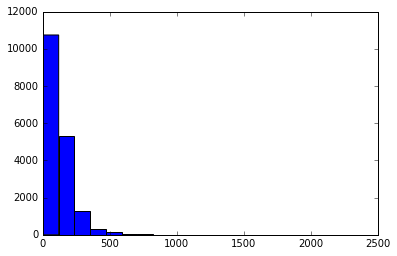

In [15]:
plt.hist(h, bins=20)

(array([  1.02480000e+04,   5.62400000e+03,   1.40000000e+03,
          3.50000000e+02,   1.50000000e+02,   5.80000000e+01,
          2.10000000e+01,   9.00000000e+00,   8.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  2.00000000e+00,   1.16750000e+02,   2.31500000e+02,
          3.46250000e+02,   4.61000000e+02,   5.75750000e+02,
          6.90500000e+02,   8.05250000e+02,   9.20000000e+02,
          1.03475000e+03,   1.14950000e+03,   1.26425000e+03,
          1.37900000e+03,   1.49375000e+03,   1.60850000e+03,
          1.72325000e+03,   1.83800000e+03,   1.95275000e+03,
          2.06750000e+03,   2.18225000e+03,   2.29700000e+03]),
 <a list of 20 Patch objects>)

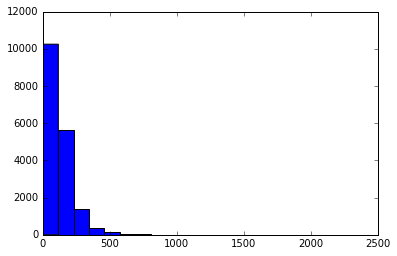

In [16]:
plt.hist(t, bins=20)

In [17]:
all_s1 = [x for x in all_s1 if len(x)!=0]
all_s2 = [x for x in all_s2 if len(x)!=0]

len(all_s1), len(all_s2)

(17881, 17881)

In [20]:
max_len = 250
sum((t <= max_len) * (h <= max_len))

16176

In [42]:
combined_lines = []

for x, y in zip(all_s1, all_s2):
    
    if len(x) <= max_len and len(y) <= max_len:
        if x[:6] != "В лѣто":
        
            new = x+'\t'+y+'\n' 
            
            new = new.replace(".", '') #!!!
            
            combined_lines += [new]


In [43]:
#!!!
out_file = 'processed_v6_maxlen%s.txt'%max_len

with open(data_path+out_file, 'w', encoding='utf-8') as f:
    f.writelines(combined_lines)

In [133]:
'С' == 'С'
'я' == 'я'

True

In [256]:
combined_lines

['Се начнемь повѣсть сию\tТак начнем же повесть эту\n',
 'По потопѣ бо 3-е сынове Ноеви роздѣлиша земьлю: Симъ, Хамъ, Афетъ\tПосле потопа трое сыновей Ноя разделили землю: Сим, Хам, Иафет\n',
 'Яся въстокъ Симови: Перьсида, Ватрь, доже и до Иньдикия в долготу, и в широту и до Нирокуриа, якоже рещи от въстока доже и до полуднья, и Сурия, и Мидиа по Ефратъ рѣку, и Вавилонъ, Кордуна, асурианѣ, Месопотамиа, Аравиа Старѣйшая, Елумаисъ, Индия, Аравия Силная, Кулии, Комагины, Финикия вся\tИ достался восток Симу: Персия, Бактрия, даже и до Индии в долготу, а в ширину до Ринокорура, то есть от востока и до юга, и Сирия, и Мидия до реки Евфрат, и Вавилон, Кордуна, ассирияне, Месопотамия, Аравия Старейшая, Елмаис, Индия, Аравия Сильная, Кулия, Коммагена, вся Финикия\n',
 'Хамови же яся полуденья часть: Егупетъ, Ефиопья, прилежащия къ Индомъ, другая же Ефиопья, из неяже исходить рѣка ефиопьскаа Чермьна, текущия на въстокъ, Фива, Луви, прилежащи доже до Куриния, Мармариа, суритѣ, Ливуи другая, Нуми

In [259]:
len(combined_lines)

744

In [166]:
cnt

82

In [119]:
parse_ok, all_nonempty

(264, 391)

In [120]:
parse_ok_parts

1736

In [82]:
len(lines)

1172

In [171]:
# for line in lines[: min(num_samples, len(lines) - 1)]:
#     input_text, target_text = line.split('\t')
#     # We use "tab" as the "start sequence" character
#     # for the targets, and "\n" as "end sequence" character.
#     target_text = '\t' + target_text + '\n'
#     input_texts.append(input_text)
#     target_texts.append(target_text)
#     for char in input_text:
#         if char not in input_characters:
#             input_characters.add(char)
#     for char in target_text:
#         if char not in target_characters:
#             target_characters.add(char)

In [170]:
# import urllib
# from bs4 import BeautifulSoup

# url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
# html = urllib.urlopen(url).read()
# soup = BeautifulSoup(html)

# # kill all script and style elements
# for script in soup(["script", "style"]):
#     script.extract()    # rip it out

# # get text
# text = soup.get_text()

# # break into lines and remove leading and trailing space on each
# lines = (line.strip() for line in text.splitlines())
# # break multi-headlines into a line each
# chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# # drop blank lines
# text = '\n'.join(chunk for chunk in chunks if chunk)

# print(text)

special

ѣ

« 
(1073)

6581 (1073)


[417]

̀̀и 

20.[416]

ибо не твердо верил он в них <Бориса и Глеба>

 — находники, а коренные жители в Новгороде — славяне, в Полоцке — кривичи, в Ростове — меря, в Белоозере — весь, в Муроме — мурома, и над теми всеми властвовал Рюрик.
 

И бяста у него два мужа, не племени его, но боярина, и та испросистася къ Цесарюграду с родом своимъ. И поидоста по Дънепру, идуче мимо и узрѣста на горѣ городокъ. И въспрошаста, ркуще: «Чий се городъ?» Они же ркоша: «Была суть три братья — 


По потопѣ бо 3-е сынове

идя, — я <бы> сказал, — что Бог хо

In [250]:
# import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"] = ""